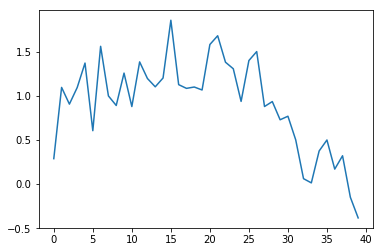

In [376]:
#Subir datos
import time
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from bs4 import BeautifulSoup

#Generar datos
t=np.arange(0,4,.1)
y=np.sin(t)+np.random.rand(t.size)
plt.plot(y)
plt.show()

dir=" https://api.thingspeak.com/update?api_key=2MBJI4X0LARPJXRV&field1="
urllib.request.urlopen(dir+"0")
#Subir datos
#for i in range(0,y.size):
#    with urllib.request.urlopen(dir+str(y[i])) as url:
#        s = url.read()
#        time.sleep(10)
#        print(y[i])
#I'm guessing this would output the html source code?
#print(s)

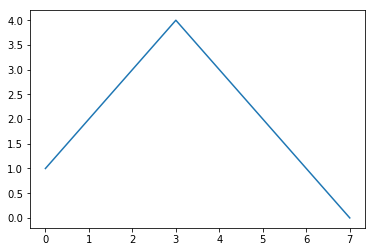

In [1]:
#Importamos las librearias a utilizar
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from bs4 import BeautifulSoup
import re

#Obtenemos el link donde se alojan los datos
dir2="https://api.thingspeak.com/channels/297571/feeds.json?results="
datafrom=urllib.request.urlopen(dir2)
select=repr(datafrom.read())
#Creamos la lista donde se guardaran los valores
values=list()
# Llamamos a la función que extrae los datos
def GetData(select):
    select=select[200:]
    values=list()
    while True:
        pick=re.search('field1":"(.+?)"',select)
        values.append(pick.group(0)[9:10])
        select=select[65:]
        if len(select)<1:
            break
    return values
values=GetData(select)
# Graficamos
plt.plot(values)
plt.show()

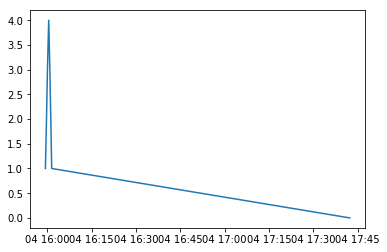

In [2]:
#Importamos las librearias a utilizar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import urllib.request
from bs4 import BeautifulSoup
import re
from datetime import datetime

#Obtenemos el link donde se alojan los datos
dir2="https://api.thingspeak.com/channels/297571/feeds.json?results="
datafrom=urllib.request.urlopen(dir2)
select=repr(datafrom.read())
#Creamos las listas donde se obtienen los valores
fecha=list()
hora=list()

def GetTime(select):
    select=select[198:]
    fecha=list()
    hora=list()
    while True:
        pick=re.search('created_at":"(.+?)"',select)
        fecha.append(pick.group(0)[13:23])
        hora.append(pick.group(0)[24:32])
        select=select[64:]
        if len(select)<10:
            break
    return fecha,hora
fecha,hora=GetTime(select)
time=list()
for i in range(0,len(fecha)):
    time.append(datetime(int(fecha[i][0:4]), int(fecha[i][5:7]), int(fecha[i][8:10]), int(hora[i][0:2]), int(hora[i][3:5]),int(hora[i][6:8])))
plt.plot(time,values)
plt.show()